# Permasalahan Regresi

Pertama-tama, download repository dari mitdeeplearning, install dependensi dan import paket yang dibutuhkan dalam latihan ini

In [373]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

#!pip install mitdeeplearning
#import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import seaborn as sns

# Nyalakan fitur ini jika menggunakan GPU atau ragu apakah tersedia GPU atau tidak
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

## Load Datasets Boston Housing Price

Eksplorasi ini akan menggunakan dataset Boston Housing Price<br>
Terdapat 13 variabel pada independen variabel (x) <br>
Total dataset training 404<br>
Total dataset test 102<br>

In [374]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
                                          path="boston_housing.npz", test_split=0.2, seed=113
                                        )
#tampilkan dimensi dataset
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_train[0:2]

x_train.shape (404, 13)
y_train.shape (404,)
x_test.shape (102, 13)
y_test.shape (102,)


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00]])

Normalisasi data

In [375]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train = (x_train - train_mean)/train_std

x_train[0:2]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239]])

In [376]:
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(np.array(x_train))
#print(normalizer.mean.numpy())
#first = np.array(x_train[:1])

#with np.printoptions(precision=2, suppress=True):
#  print('First example:', first)
#  print()
#  print('Normalized:', normalizer(first).numpy())

## Membangun Model Neural Network

In [377]:
def build_nn_model():
    nn_model = tf.keras.Sequential([
        #normalizer,
        # Mendefinisikan dense layer pertama
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        # Mendefinisikan dense layer kedua
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        #tf.keras.layers.Dense(64, activation=tf.nn.relu),
        # Mendefinisikan dense layer untuk output 
        tf.keras.layers.Dense(1)
    ])
    
    return nn_model
  
tf.random.set_seed(0)
nn_model = build_nn_model()
# Initialize the model by passing some data through
nn_model.predict(x_train)
# Print the summary of the layers in the model.
print(nn_model.summary())

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 64)                896       
                                                                 
 dense_179 (Dense)           (None, 64)                4160      
                                                                 
 dense_180 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


## Melakukan Training dan tes Model CNN

In [378]:
# Mendefinisikan compile operation dengan konfigurasi optimizer dan learning rate 
#nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#              loss='mse',
#              metrics=['mae'])

nn_model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mean_absolute_error',
              metrics=['mae'])
#nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
#              loss='mean_squared_error',
#              metrics=['mse'])


In [379]:
%%time
history = nn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.44 s, sys: 245 ms, total: 5.68 s
Wall time: 5.74 s


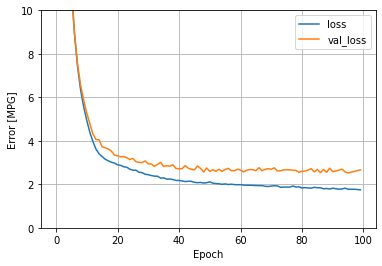

In [380]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)

In [385]:
train_mean_test = np.mean(x_test, axis=0)
train_std_test = np.std(x_test, axis=0)
x_test = (x_test - train_mean_test)/train_std_test

x_test[0:2]

# Melakukan tes pada dataset testing
test_loss, test_acc = nn_model.evaluate(x_test, y_test)

print('test_loss:', test_loss)
print('Test accuracy:', test_acc)
print('x_test', x_test[0:2])

4/4 [==============================] - 0s 3ms/step - loss: 3.0850 - mae: 3.0850
test_loss: 3.084951877593994
Test accuracy: 3.084951877593994
x_test [[ 2.8040301  -0.50784934  0.96960877 -0.32969024  1.23174581  0.11934137
   1.14739788 -0.91935276  1.60609286  1.40778227  0.90513041 -4.27829517
   2.51324773]
 [-0.55530596 -0.50784934 -0.17801704 -0.32969024  0.02597985 -0.65939625
   0.90165779 -0.70033281 -0.4559956   0.08214424 -0.28485844  0.3909446
   0.58604286]]


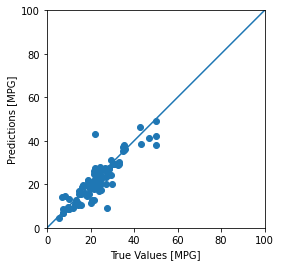

In [382]:
test_predictions = nn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

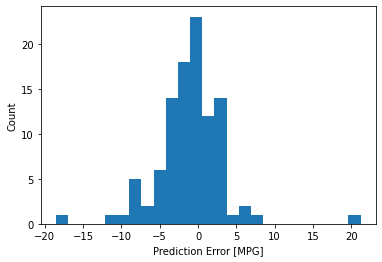

In [383]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')